Data loaded successfully. Here are the first few rows:
                Patient       Date  Time  Age  Gender (M=1;F=0)  \
0  Joshua Thomas Brooks 2024-08-04  2130   33                 1   
1  Joshua Thomas Brooks 2024-08-04  2145   33                 1   
2  Joshua Thomas Brooks 2024-08-05   935   33                 1   
3  Joshua Thomas Brooks 2024-08-05  1110   33                 1   
4  Joshua Thomas Brooks 2024-08-05  1357   33                 1   

   Acetone ketones ppm  Blood Pressure Top  Blood Pressure Bottom  Pulse  \
0                    9                 115                     72     98   
1                    5                 105                     66     94   
2                    2                 117                     74     96   
3                    0                 115                     68     93   
4                    3                 103                     61     67   

   Heart Rate  Temperature  Pulse Oxygen  Interstital Fluid  
0          99         9

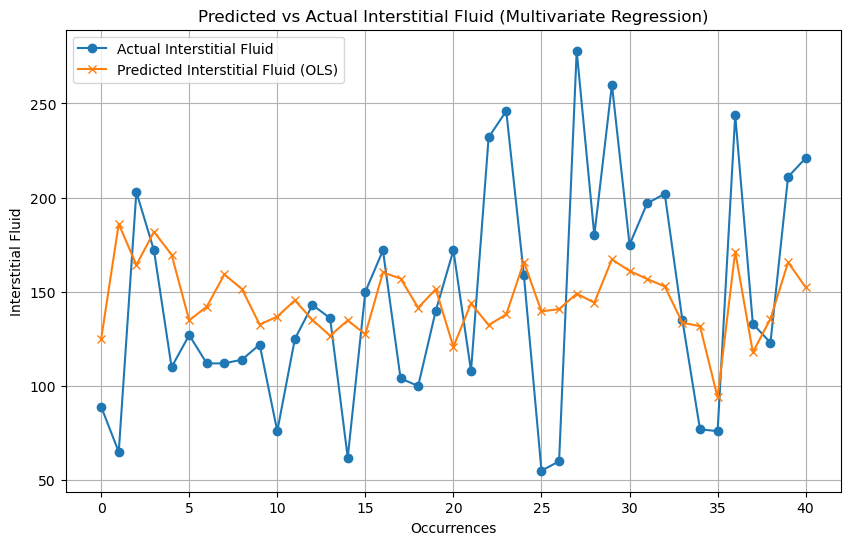

                            OLS Regression Results                            
Dep. Variable:      Interstital Fluid   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.6018
Date:                Mon, 12 Aug 2024   Prob (F-statistic):              0.727
Time:                        13:48:58   Log-Likelihood:                -222.87
No. Observations:                  41   AIC:                             459.7
Df Residuals:                      34   BIC:                             471.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -835.76

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ensure plots are displayed inline in the notebook
%matplotlib inline

# Function to load data from the uploaded file
def load_data(file_path):
    df = pd.read_excel(file_path)
    return df

# Initial data load
file_path = 'Moni.xlsx'
df = load_data(file_path)

# Display the first few rows of the dataset to confirm it's loaded correctly
print("Data loaded successfully. Here are the first few rows:")
print(df.head())

# Prepare the data (excluding "Acetone ketones ppm")
X = df[["Blood Pressure Top", "Blood Pressure Bottom", "Pulse", "Heart Rate", "Temperature", "Pulse Oxygen"]]
y = df["Interstital Fluid"]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create the multivariate regression model and fit it
model = sm.OLS(y, X).fit()

# Get the summary of the model
summary = model.summary()

# Predict the interstitial fluid using the regression model
df['Predicted Interstitial Fluid (OLS)'] = model.predict(X)

# Prepare the next data point for prediction
# Create the next data point manually to match the original dataset's structure
next_data_point = pd.DataFrame([X.iloc[-1, 1:].values], columns=X.columns[1:])
next_data_point = sm.add_constant(next_data_point, has_constant='add')

# Predict the next interstitial fluid reading
next_prediction = model.predict(next_data_point)[0]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Interstital Fluid'], label='Actual Interstitial Fluid', marker='o')
plt.plot(df.index, df['Predicted Interstitial Fluid (OLS)'], label='Predicted Interstitial Fluid (OLS)', marker='x')
plt.xlabel('Occurrences')
plt.ylabel('Interstitial Fluid')
plt.title('Predicted vs Actual Interstitial Fluid (Multivariate Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Print the model summary and the next predicted interstitial fluid reading
print(summary)
print(f"Next predicted interstitial fluid reading: {next_prediction}")

# Generate the formula equation in Excel format
coefficients = model.params
excel_formula = f"={coefficients['const']}"
columns = ["B2", "C2", "D2", "E2", "F2", "G2"]
feature_names = ["Blood Pressure Top", "Blood Pressure Bottom", "Pulse", "Heart Rate", "Temperature", "Pulse Oxygen"]

for col, feature in zip(columns, feature_names):
    excel_formula += f" + ({coefficients[feature]} * {col})"

print("\nExcel Formula:")
print(excel_formula)
